### Date Preparation

#### Import libraries

In [1]:
import numpy as np
import pandas as pd
import os
os.chdir(r'C:\Users\trish\Important Docs\Credit Risk Modeling')

#### Import data

In [2]:
loan = pd.read_csv(r'loan\loan.csv')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (19,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


#### Explore data

In [3]:
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
pd.options.display.max_columns = None

In [5]:
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,1.0,NaN,NaN,3.0,0.0,13648.0,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-2015,171.62,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-2011,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-1999,5.0,NaN,NaN,3.0,0.0,1687.0,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-2013,119.66,NaN,Sep-2013,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-2001,2.0,NaN,NaN,2.0,0.0,2956.0,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-2014,649.91,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-1996,1.0,35.0,NaN,10.0,0.0,5598.0,21.0,37.0,f,0.0,0.0,12226.302212,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-2015,357.48,NaN,Jan-2015,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-2011,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-1996,0.0,38.0,NaN,15.0,0.0,27783.0,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-2016,67.79,Feb-2016,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
loan.columns.values

array(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'pymnt_plan',
       'url', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d',
       'last_credit_pull_d', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'policy_code', 'application_type',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint

In [7]:
loan.info() #Checking the datatypes of each of the columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 74 columns):
id                             887379 non-null int64
member_id                      887379 non-null int64
loan_amnt                      887379 non-null float64
funded_amnt                    887379 non-null float64
funded_amnt_inv                887379 non-null float64
term                           887379 non-null object
int_rate                       887379 non-null float64
installment                    887379 non-null float64
grade                          887379 non-null object
sub_grade                      887379 non-null object
emp_title                      835917 non-null object
emp_length                     842554 non-null object
home_ownership                 887379 non-null object
annual_inc                     887375 non-null float64
verification_status            887379 non-null object
issue_d                        887379 non-null object
loan_status          

After carefully looking at the datatypes above, the variables 'term' and 'emp_length', which are expected to be integer type, are 'object' type by default. Hence, we begin by changing them to more meaningful datatypes first.

#### General preprocessing - continuous variables

In [8]:
loan['emp_length'].unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

In [9]:
loan['emp_length_int'] = loan['emp_length'].str.replace('\+ years','')
loan['emp_length_int'] = loan['emp_length_int'].str.replace('< 1 year', str(0))
loan['emp_length_int'] = loan['emp_length_int'].str.replace('n/a', str(0))
loan['emp_length_int'] = loan['emp_length_int'].str.replace(' years','')
loan['emp_length_int'] = loan['emp_length_int'].str.replace(' year','')

In [10]:
type(loan['emp_length'][0])

str

In [11]:
loan['emp_length_int'].unique()

array(['10', '0', '1', '3', '8', '9', '4', '5', '6', '2', '7', nan],
      dtype=object)

In [12]:
loan['emp_length_int'] = pd.to_numeric(loan['emp_length_int'])
type(loan['emp_length_int'][0])

numpy.float64

Similarly, we will also preprocess the 'term variable'.

In [13]:
loan['term'].unique()

array([' 36 months', ' 60 months'], dtype=object)

In [14]:
loan['term_int'] = loan['term'].str.replace(' months','')
loan['term_int'] = pd.to_numeric(loan['term_int'])
print('The unique values in term_int are  : ', loan['term_int'].unique())
print('The datatype of term_int is ', type(loan['term_int'][0]))

The unique values in term_int are  :  [36 60]
The datatype of term_int is  <class 'numpy.int64'>


Let us look at two other variables that should have been date type, but are string type
1. Date of earliest credit line
2. Issue date

These variables need to be converted to timestamp.

In [15]:
loan['earliest_cr_line']

0         Jan-1985
1         Apr-1999
2         Nov-2001
3         Feb-1996
4         Jan-1996
5         Nov-2004
6         Jul-2005
7         Jan-2007
8         Apr-2004
9         Sep-2004
10        Jan-1998
11        Oct-1989
12        Apr-2004
13        Jul-2003
14        May-1991
15        Sep-2007
16        Oct-1998
17        Aug-1993
18        Oct-2003
19        Jan-2001
20        Nov-1997
21        Feb-1983
22        Jul-1985
23        Apr-2003
24        Jun-2001
25        Feb-2002
26        Oct-2003
27        Oct-2003
28        Aug-1984
29        Nov-2006
            ...   
887349    Mar-1998
887350    Aug-2002
887351    Aug-1990
887352    Dec-2006
887353    Jan-1989
887354    Jun-2001
887355    Jun-1993
887356    Dec-1994
887357    Jul-2002
887358    May-2003
887359    May-2003
887360    Aug-1983
887361    Oct-1994
887362    Sep-2003
887363    Oct-2006
887364    Nov-1975
887365    Nov-2006
887366    Feb-2011
887367    Mar-2000
887368    May-1994
887369    Sep-2002
887370    Au

In [16]:
loan['earliest_cr_line_date'] = pd.to_datetime(loan['earliest_cr_line'], format = '%b-%Y')
type(loan['earliest_cr_line_date'][0])

pandas._libs.tslibs.timestamps.Timestamp

Now, we want to compute the time elapsed between today, and when the earliest credit line was issuesd for all the borrowers. To do that, we will create a new variable that will check the differnece between the two time stamps.

In [17]:
pd.to_datetime('2020-04-05') - loan['earliest_cr_line_date']
loan['mnths_since_earliest_cr_line'] = round(pd.to_numeric((pd.to_datetime('2020-04-05') - loan['earliest_cr_line_date']) / np.timedelta64(1, 'M')))
loan['mnths_since_earliest_cr_line'].describe()

count    887350.000000
mean        264.841713
std          89.242280
min          89.000000
25%         203.000000
50%         247.000000
75%         310.000000
max         915.000000
Name: mnths_since_earliest_cr_line, dtype: float64

In [18]:
loan['issue_d'] = pd.to_datetime(loan['issue_d'], format = '%b-%Y')
type(loan['issue_d'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [19]:
pd.to_datetime('2020-04-05') - loan['issue_d']
loan['mnths_since_issue_d'] = round(pd.to_numeric((pd.to_datetime('2020-04-05') - loan['issue_d']) / np.timedelta64(1, 'M')))
loan['mnths_since_issue_d'].describe()

count    887379.000000
mean         68.715460
std          15.386312
min          52.000000
25%          57.000000
50%          65.000000
75%          76.000000
max         154.000000
Name: mnths_since_issue_d, dtype: float64

#### Preprocessing discrete variables

In [20]:
#Creating dummy variables for discrete variables

loan_data_dummies = [pd.get_dummies(loan['grade'], prefix = 'grade', prefix_sep = '_'),
                    pd.get_dummies(loan['sub_grade'], prefix = 'sub_grade', prefix_sep = '_'),
                    pd.get_dummies(loan['home_ownership'], prefix = 'home_ownership', prefix_sep = '_'),
                    pd.get_dummies(loan['verification_status'], prefix = 'verification_status', prefix_sep = '_'),
                    pd.get_dummies(loan['loan_status'], prefix = 'loan_status', prefix_sep = '_'),
                    pd.get_dummies(loan['purpose'], prefix = 'purpose', prefix_sep = '_'),
                    pd.get_dummies(loan['addr_state'], prefix = 'addr_state', prefix_sep = '_'),
                    pd.get_dummies(loan['initial_list_status'], prefix = 'initial_list_status', prefix_sep = '_')]

In [21]:
loan_data_dummies = pd.concat(loan_data_dummies, axis = 1)
type(loan_data_dummies)

pandas.core.frame.DataFrame

In [22]:
loan = pd.concat([loan, loan_data_dummies], axis = 1)
loan.columns.values

array(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'pymnt_plan',
       'url', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d',
       'last_credit_pull_d', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'policy_code', 'application_type',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint

#### Check for missing values

In [23]:
pd.options.display.max_rows = None
loan.isnull().sum()

id                                                                      0
member_id                                                               0
loan_amnt                                                               0
funded_amnt                                                             0
funded_amnt_inv                                                         0
term                                                                    0
int_rate                                                                0
installment                                                             0
grade                                                                   0
sub_grade                                                               0
emp_title                                                           51462
emp_length                                                          44825
home_ownership                                                          0
annual_inc                            

#### Imputing missing values

In case of missing values in total revolving limit, it makes sense to substitute it with the funded amount. Hence we conduct the imputation accordingly.

In [24]:
loan['total_rev_hi_lim'].fillna(loan['funded_amnt'], inplace = True)
loan['total_rev_hi_lim'].isnull().sum()

0

In [25]:
loan['annual_inc'].fillna(loan['annual_inc'].mean(), inplace = True)
loan['annual_inc'].isnull().sum()

0

In [26]:
list_vars = ['mnths_since_earliest_cr_line',
             'acc_now_delinq',
             'total_acc',
             'pub_rec',
             'open_acc',
             'inq_last_6mths',
             'delinq_2yrs',
             'emp_length_int']


for var in list_vars:
    loan[var].fillna(0, inplace = True)
    print('The no. of null values in ' + str(var) + ' are ', str(loan[var].isnull().sum()))

The no. of null values in mnths_since_earliest_cr_line are  0
The no. of null values in acc_now_delinq are  0
The no. of null values in total_acc are  0
The no. of null values in pub_rec are  0
The no. of null values in open_acc are  0
The no. of null values in inq_last_6mths are  0
The no. of null values in delinq_2yrs are  0
The no. of null values in emp_length_int are  0


### PD Model

#### Data Preparation

Here, the objective is to create the target variable i.e; good loan/ bad loan definition for the probability of defaulting estimation. 

In [27]:
loan['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Current', 'Default',
       'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off', 'Issued'],
      dtype=object)

Among all the available loan status, the ones that indicate bad loans are as follows
1. Charged off
2. Default

To be able to decide a good or bad loan, we want to check how many or what % of the accounts fall into each of these categories.

In [28]:
loan['loan_status'].value_counts()*100/loan['loan_status'].count()
#The values shown below are in percentage.

Current                                                67.815330
Fully Paid                                             23.408600
Charged Off                                             5.099061
Late (31-120 days)                                      1.306206
Issued                                                  0.953369
In Grace Period                                         0.704659
Late (16-30 days)                                       0.265614
Does not meet the credit policy. Status:Fully Paid      0.224031
Default                                                 0.137371
Does not meet the credit policy. Status:Charged Off     0.085758
Name: loan_status, dtype: float64

In [29]:
loan['good_bad_loan'] = np.where(loan['loan_status'].isin(['Charged Off', 'Default',
                                                          'Does not meet the credit policy. Status:Charged Off',
                                                          'Late (31-120 days)']), 0, 1)

In [30]:
loan.to_csv('loan_preprocessed.csv')

#### Splitting the data

In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(loan.drop('good_bad_loan', axis = 1), loan['good_bad_loan'], test_size = 0.2, random_state = 1234)
print('The shape of training set is ', X_train.shape)
print('The shape of test set is ', X_test.shape)
print('The shape of train target set is ', y_train.shape)
print('The shape of test label is ', y_test.shape)

The shape of training set is  (709903, 207)
The shape of test set is  (177476, 207)
The shape of train target set is  (709903,)
The shape of test label is  (177476,)


#### WOE and IV Computation to select important variables

In [32]:
def woe_discrete(df, discrete_var, good_bad_df):
    df = pd.concat([df[discrete_var], good_bad_df], axis = 1)
    df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
                    df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)
    df = df.iloc[:, [0, 1, 3]]
    df.columns = [df.columns.values[0], 'obs', 'good_prop']
    df['prop_obs'] = df['obs']/df['obs'].sum()
    df['good'] = df['good_prop']*df['obs']
    df['bad'] = (1-df['good_prop'])*df['obs']
    df['prop_good'] = df['good'] / df['good'].sum()
    df['prop_bad'] = df['bad'] / df['bad'].sum()
    df['woe'] = np.log(df['prop_good'] / df['prop_bad'])
    df = df.sort_values(['woe'])
    df = df.reset_index(drop = True)
    df['diff_prop_good'] = df['good_prop'].diff().abs()
    df['diff_woe'] = df['woe'].diff().abs()
    df['IV'] = (df['prop_good'] - df['prop_bad'])*df['woe']
    df['IV'] = df['IV'].sum()
    return df

In [33]:
#df_discrete = X_train.copy()
#good_bad_var = y_train.copy()

df_discrete = X_test.copy()
good_bad_var = y_test.copy()
df_temp = woe_discrete(df_discrete, 'grade', good_bad_var)
print(df_temp)

  grade    obs  good_prop  prop_obs     good     bad  prop_good  prop_bad  \
0     G   1044   0.793103  0.005882    828.0   216.0   0.004992  0.018590   
1     F   4664   0.841338  0.026280   3924.0   740.0   0.023659  0.063689   
2     E  14131   0.880617  0.079622  12444.0  1687.0   0.075028  0.145193   
3     D  27829   0.900967  0.156804  25073.0  2756.0   0.151172  0.237198   
4     C  49160   0.932791  0.276995  45856.0  3304.0   0.276479  0.284362   
5     B  50768   0.954853  0.286056  48476.0  2292.0   0.292276  0.197263   
6     A  29880   0.979116  0.168361  29256.0   624.0   0.176393  0.053705   

        woe  diff_prop_good  diff_woe        IV  
0 -1.314750             NaN       NaN  0.326071  
1 -0.990268        0.048234  0.324482  0.326071  
2 -0.660198        0.039279  0.330070  0.326071  
3 -0.450473        0.020350  0.209724  0.326071  
4 -0.028112        0.031824  0.422361  0.326071  
5  0.393160        0.022063  0.421272  0.326071  
6  1.189205        0.024263  0.79

#### Visulaizing results

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [35]:
def woe_plot(df, x_axis_rotation = 0):
    x = np.array(df.iloc[:, 0].apply(str))
    y = df['woe']
    plt.figure(figsize = (18, 6))
    plt.plot(x, y, marker = 'o', linestyle = '--', color = 'k')
    plt.xlabel(df.columns[0])
    plt.ylabel('Weight of Evidence')
    plt.title(str('Weight of Evidence by ' + str(df.columns[0])))
    plt.xticks(rotation = x_axis_rotation)
    

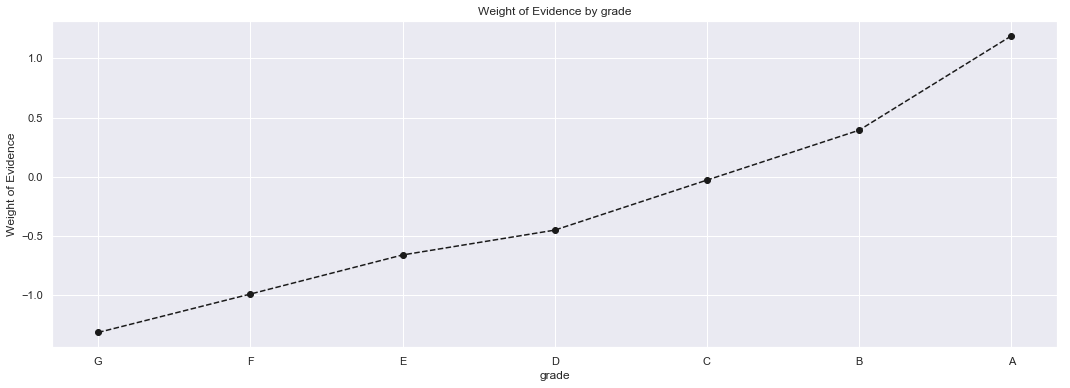

In [36]:
woe_plot(df_temp)

#### Creating dummy variables from discrete variables  - I

In [37]:
df_temp = woe_discrete(df_discrete, 'home_ownership', good_bad_var)
df_temp

,home_ownership,obs,good_prop,prop_obs,good,bad,prop_good,prop_bad,woe,diff_prop_good,diff_woe,IV
0,NONE,9,0.777778,0.000051,7.0,2.0,0.000042,0.000172,-1.405721,NaN,NaN,0.026151
1,OTHER,43,0.883721,0.000242,38.0,5.0,0.000229,0.000430,-0.630336,0.105943,0.775385,0.026151
2,RENT,71326,0.922567,0.401891,65803.0,5523.0,0.396745,0.475342,-0.180740,0.038846,0.449596,0.026151
3,OWN,17440,0.938704,0.098267,16371.0,1069.0,0.098706,0.092004,0.070304,0.016137,0.251044,0.026151
4,MORTGAGE,88658,0.943378,0.499549,83638.0,5020.0,0.504278,0.432051,0.154584,0.004674,0.084280,0.026151


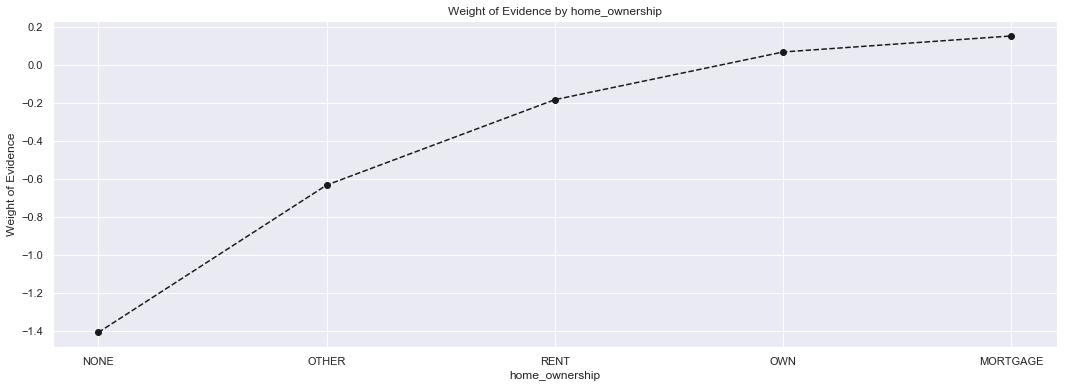

In [38]:
woe_plot(df_temp)

As we can see in the table and plot above, the categories 'OTHER' and 'NONE' have very few loans associated with them. Also, WOE couldn't be calculated for the category 'ANY' as there was only 1 observation. Hence, we combine these under-represented cases with one of the most-represented categories, which is 'RENT'.

In [39]:
df_discrete['home_ownership_RENT_OTHER_NONE_ANY'] = sum([df_discrete['home_ownership_RENT'], df_discrete['home_ownership_NONE'], 
                                                    df_discrete['home_ownership_ANY'], df_discrete['home_ownership_OTHER']])

In [40]:
df_temp = woe_discrete(df_discrete, 'addr_state', good_bad_var)
df_temp

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\algorithms.py:1823: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


,addr_state,obs,good_prop,prop_obs,good,bad,prop_good,prop_bad,woe,diff_prop_good,diff_woe,IV
0,ID,2,0.500000,0.000011,1.0,1.0,0.000006,0.000086,-2.658484,NaN,NaN,inf
1,NV,2454,0.917278,0.013827,2251.0,203.0,0.013572,0.017471,-0.252560,0.417278,2.405924,inf
2,AR,1307,0.920428,0.007364,1203.0,104.0,0.007253,0.008951,-0.210301,0.003151,0.042259,inf
3,NY,15028,0.922145,0.084676,13858.0,1170.0,0.083554,0.100697,-0.186625,0.001717,0.023676,inf
4,OK,1661,0.922336,0.009359,1532.0,129.0,0.009237,0.011103,-0.183967,0.000191,0.002658,inf
5,FL,12169,0.923741,0.068567,11241.0,928.0,0.067775,0.079869,-0.164193,0.001405,0.019774,inf
6,AL,2220,0.923874,0.012509,2051.0,169.0,0.012366,0.014545,-0.162300,0.000133,0.001893,inf
7,HI,879,0.926052,0.004953,814.0,65.0,0.004908,0.005594,-0.130911,0.002178,0.031389,inf
8,MD,4175,0.928862,0.023524,3878.0,297.0,0.023382,0.025562,-0.089142,0.002810,0.041770,inf
9,CA,25766,0.929481,0.145180,23949.0,1817.0,0.144395,0.156382,-0.079745,0.000618,0.009397,inf


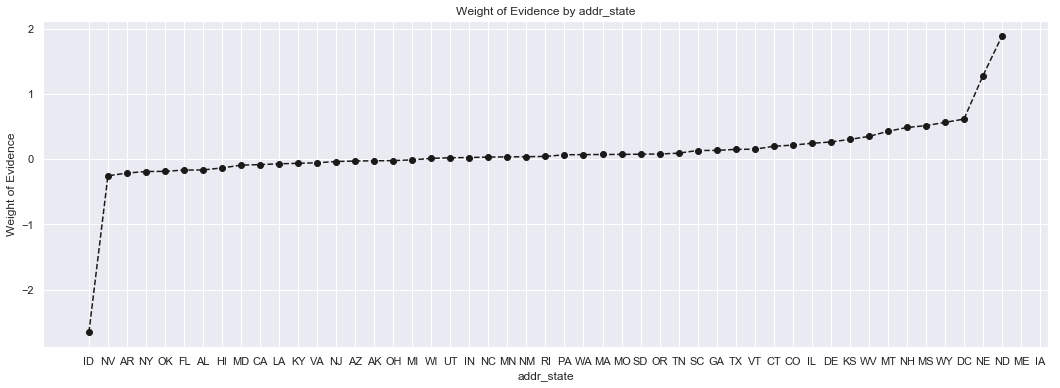

In [41]:
woe_plot(df_temp)

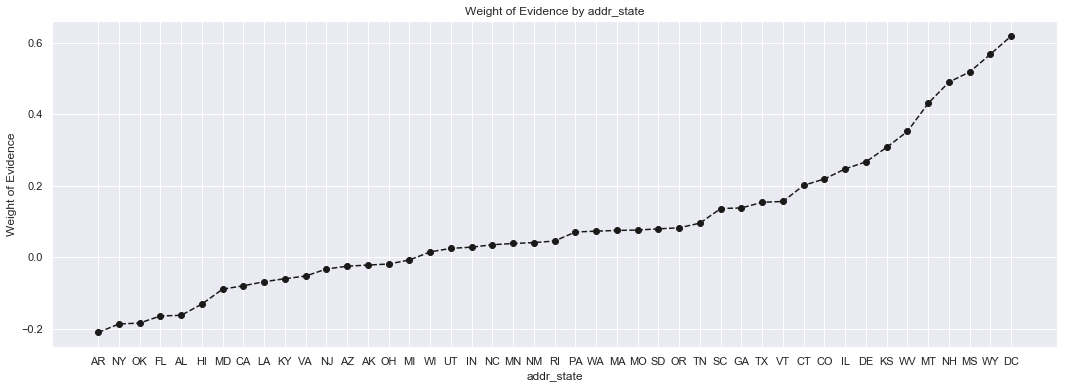

In [42]:
woe_plot(df_temp.iloc[2 : -4, :])

After removing the lowest and highest woe values states, this is the graph which obtain which shows considerable difference in the weight of evidence values for all other states.

To create logical groupings, we combine the first 6 states as poor-performing states and the last 6 states as best-performing states. After doing that, we must analyze the remaining 38 states and plot the chart for them to find the pattern.

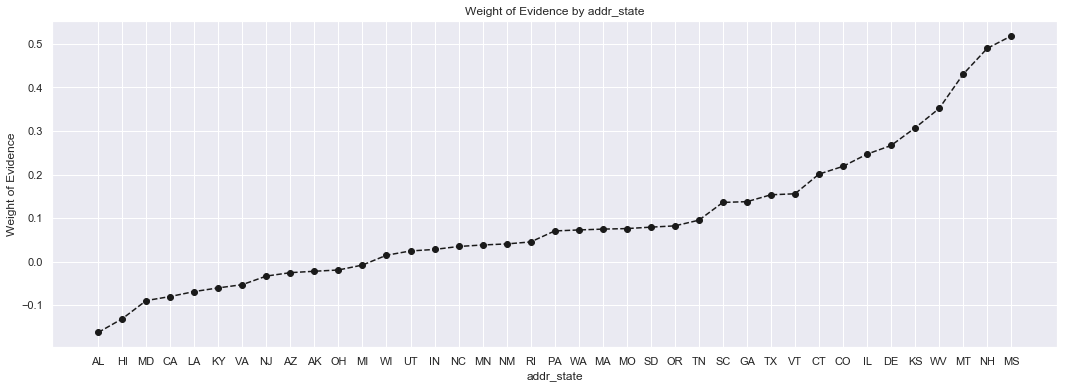

In [43]:
woe_plot(df_temp.iloc[6: -6, :])

Now we will start by creating the groups for the poor performing and the best performing states. 

In [44]:
df_discrete['addr_state_IA_NV_HI_FL_AL_SD'] = sum([df_discrete['addr_state_IA'], df_discrete['addr_state_NV'],
                                                   df_discrete['addr_state_HI'], df_discrete['addr_state_FL'],
                                                   df_discrete['addr_state_AL'], df_discrete['addr_state_SD']])

df_discrete['addr_state_NM_NY'] = sum([df_discrete['addr_state_NM'], df_discrete['addr_state_NY']])

df_discrete['addr_state_UT_CA'] = sum([df_discrete['addr_state_UT'], df_discrete['addr_state_CA']])

df_discrete['addr_state_DC_VT_MS_NE_ND_ME'] = sum([df_discrete['addr_state_DC'], df_discrete['addr_state_VT'],
                                                   df_discrete['addr_state_MS'], df_discrete['addr_state_NE'],
                                                   df_discrete['addr_state_ND'], df_discrete['addr_state_ME']])

df_discrete['addr_state_VA_NJ_LA_MO_NC_MD'] = sum([df_discrete['addr_state_VA'], df_discrete['addr_state_NJ'],
                                                   df_discrete['addr_state_LA'], df_discrete['addr_state_MO'],
                                                   df_discrete['addr_state_NC'], df_discrete['addr_state_MD']])


df_discrete['addr_state_OK_AZ_DE_RI_PA_MA'] = sum([df_discrete['addr_state_OK'], df_discrete['addr_state_AZ'],
                                                   df_discrete['addr_state_DE'], df_discrete['addr_state_RI'],
                                                   df_discrete['addr_state_PA'], df_discrete['addr_state_MA']])


df_discrete['addr_state_OTHERS'] = sum([df_discrete['addr_state_MN'], df_discrete['addr_state_MI'],
                                        df_discrete['addr_state_OH'], df_discrete['addr_state_WA'],
                                        df_discrete['addr_state_KY'], df_discrete['addr_state_AR'],
                                        df_discrete['addr_state_OR'], df_discrete['addr_state_GA'],
                                        df_discrete['addr_state_MT'], df_discrete['addr_state_TN'],
                                        df_discrete['addr_state_IN'], df_discrete['addr_state_WI'],
                                        df_discrete['addr_state_TX'], df_discrete['addr_state_CT'],
                                        df_discrete['addr_state_AK'], df_discrete['addr_state_IL'],
                                        df_discrete['addr_state_KS'], df_discrete['addr_state_CO'],
                                        df_discrete['addr_state_SC'], df_discrete['addr_state_WY'],
                                        df_discrete['addr_state_WV'], df_discrete['addr_state_NH']])


We will create similar plots for the rest of the discrete variables i.e; verification_status, purpose and initial_list_status. By using the same plot, and the WOE values, we will categorize the labels logically.

In [45]:
df_temp = woe_discrete(df_discrete, 'verification_status', good_bad_var)
df_temp

,verification_status,obs,good_prop,prop_obs,good,bad,prop_good,prop_bad,woe,diff_prop_good,diff_woe,IV
0,Verified,57924,0.916736,0.326377,53101.0,4823.0,0.320161,0.415096,-0.259685,NaN,NaN,0.039007
1,Not Verified,53323,0.942501,0.300452,50257.0,3066.0,0.303014,0.263878,0.138292,0.025766,0.397976,0.039007
2,Source Verified,66229,0.943680,0.373172,62499.0,3730.0,0.376825,0.321026,0.160258,0.001179,0.021966,0.039007


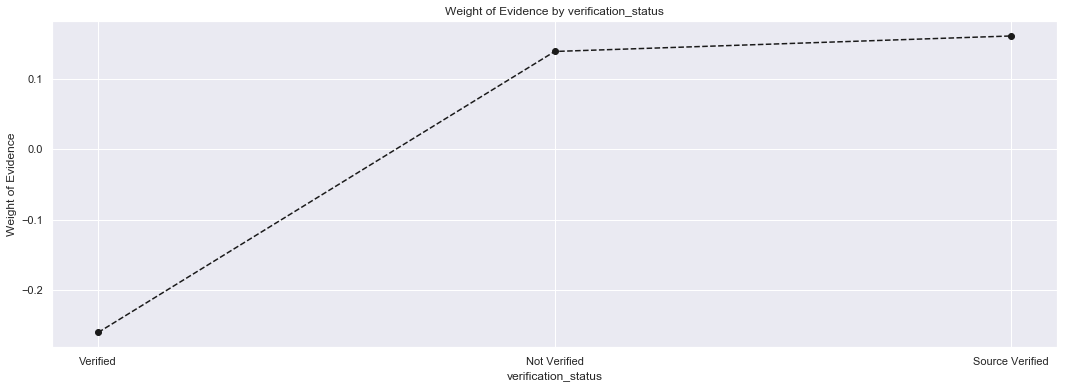

In [46]:
woe_plot(df_temp)

As we can see here, if the verification status is verified, it is more likely that the person will default. So this category can be used as the reference category. Since the distribution is almost the same here, we may not need to create new dummy variables.

Now we will repeat the same process for purpose.

               purpose     obs  good_prop  prop_obs     good     bad  \
0       small_business    2037   0.846343  0.011478   1724.0   313.0   
1          educational      74   0.864865  0.000417     64.0    10.0   
2              wedding     452   0.878319  0.002547    397.0    55.0   
3               moving    1066   0.896811  0.006006    956.0   110.0   
4              medical    1738   0.912543  0.009793   1586.0   152.0   
5                other    8616   0.913765  0.048547   7873.0   743.0   
6     renewable_energy     116   0.913793  0.000654    106.0    10.0   
7                house     734   0.919619  0.004136    675.0    59.0   
8   debt_consolidation  104985   0.932095  0.591545  97856.0  7129.0   
9       major_purchase    3441   0.934031  0.019389   3214.0   227.0   
10                 car    1741   0.934520  0.009810   1627.0   114.0   
11            vacation     951   0.937960  0.005358    892.0    59.0   
12    home_improvement   10307   0.942757  0.058075   9717.0   5

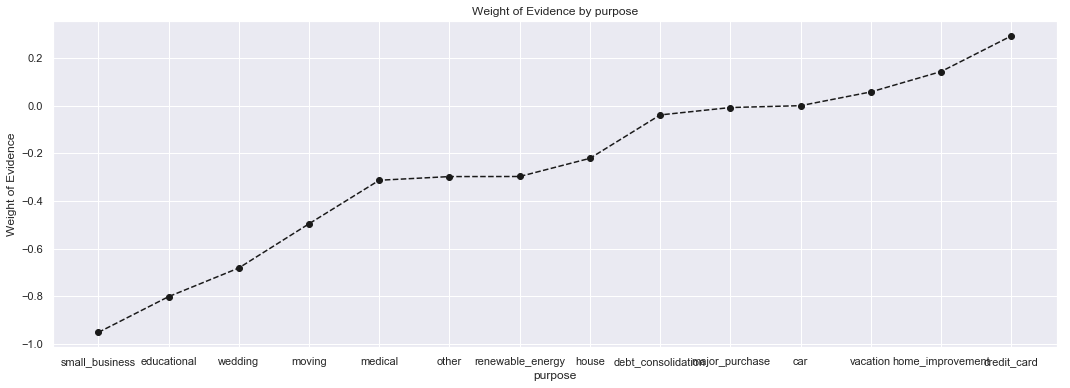

In [47]:
df_temp = woe_discrete(df_discrete, 'purpose', good_bad_var)
print(df_temp)
woe_plot(df_temp)

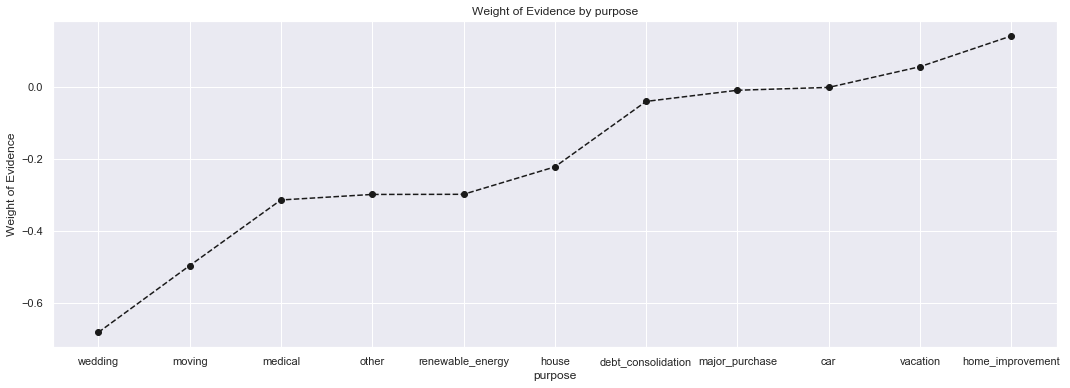

In [48]:
woe_plot(df_temp.iloc[2 : -1, :])

In [49]:
df_discrete['purpose_educational_small_business'] = sum([df_discrete['purpose_educational'], 
                                                         df_discrete['purpose_small_business']])

df_discrete['purpose_wedding_renewable_energy'] = sum([df_discrete['purpose_wedding'], 
                                                         df_discrete['purpose_renewable_energy']])

df_discrete['purpose_house_moving'] = sum([df_discrete['purpose_house'], 
                                           df_discrete['purpose_moving']])

df_discrete['purpose_medical_vacation_debt_consolidation_major_purchase'] = sum([df_discrete['purpose_medical'], 
                                           df_discrete['purpose_vacation'], df_discrete['purpose_debt_consolidation'],
                                            df_discrete['purpose_major_purchase']])

df_discrete['purpose_car_home_improvement'] = sum([df_discrete['purpose_car'], 
                                           df_discrete['purpose_home_improvement']])

  initial_list_status    obs  good_prop  prop_obs     good     bad  prop_good  \
0                   f  91428   0.912379  0.515157  83417.0  8011.0   0.502945   
1                   w  86048   0.958070  0.484843  82440.0  3608.0   0.497055   

   prop_bad       woe  diff_prop_good  diff_woe        IV  
0  0.689474 -0.315448             NaN       NaN  0.146589  
1  0.310526  0.470433        0.045691  0.785881  0.146589  


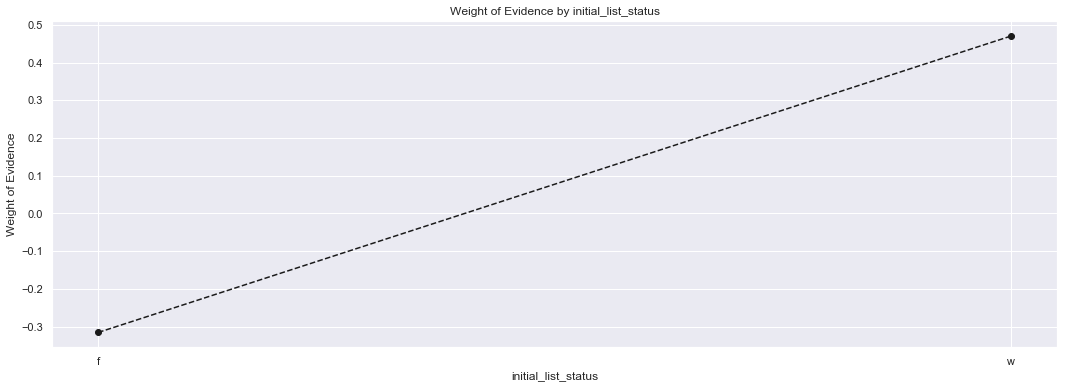

In [50]:
df_temp = woe_discrete(df_discrete, 'initial_list_status', good_bad_var)
print(df_temp)
woe_plot(df_temp)

#### Preprocessing Continuous Variables : Automatic calculations and visualizing results

In [51]:
def woe_ordered_cont(df, discrete_var, good_bad_df):
    df = pd.concat([df[discrete_var], good_bad_df], axis = 1)
    df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
                    df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)
    df = df.iloc[:, [0, 1, 3]]
    df.columns = [df.columns.values[0], 'obs', 'good_prop']
    df['prop_obs'] = df['obs']/df['obs'].sum()
    df['good'] = df['good_prop']*df['obs']
    df['bad'] = (1-df['good_prop'])*df['obs']
    df['prop_good'] = df['good'] / df['good'].sum()
    df['prop_bad'] = df['bad'] / df['bad'].sum()
    df['woe'] = np.log(df['prop_good'] / df['prop_bad'])
    #df = df.sort_values(['woe'])
    #df = df.reset_index(drop = True)
    df['diff_prop_good'] = df['good_prop'].diff().abs()
    df['diff_woe'] = df['woe'].diff().abs()
    df['IV'] = (df['prop_good'] - df['prop_bad'])*df['woe']
    df['IV'] = df['IV'].sum()
    return df

In [52]:
df_temp = woe_ordered_cont(df_discrete, 'term_int', good_bad_var)
df_temp

,term_int,obs,good_prop,prop_obs,good,bad,prop_good,prop_bad,woe,diff_prop_good,diff_woe,IV
0,36,124574,0.940662,0.70192,117182.0,7392.0,0.706524,0.636199,0.104846,NaN,NaN,0.02248
1,60,52902,0.920098,0.29808,48675.0,4227.0,0.293476,0.363801,-0.214811,0.020564,0.319657,0.02248


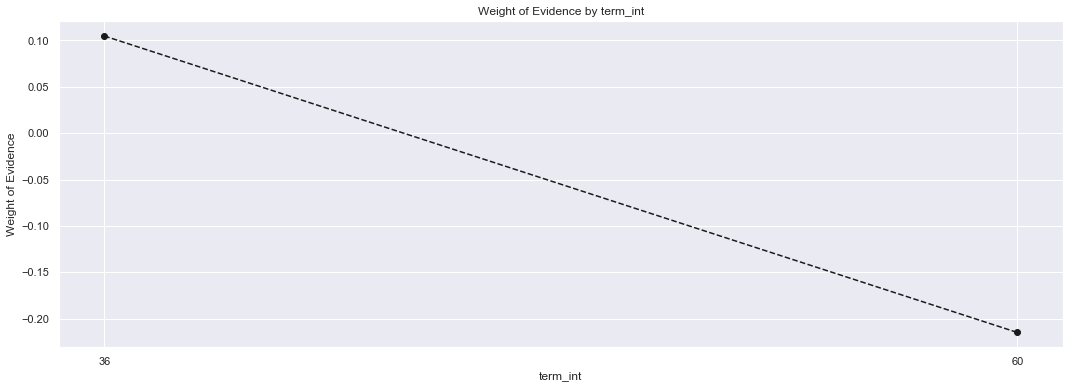

In [53]:
woe_plot(df_temp)

In [54]:
df_discrete['term_36'] = np.where((df_discrete['term_int'] == 36), 1, 0)
df_discrete['term_60'] = np.where((df_discrete['term_int'] == 60), 1, 0)

    emp_length_int    obs  good_prop  prop_obs     good     bad  prop_good  \
0              0.0  23050   0.926334  0.129877  21352.0  1698.0   0.128737   
1              1.0  11315   0.931242  0.063755  10537.0   778.0   0.063531   
2              2.0  15703   0.935108  0.088480  14684.0  1019.0   0.088534   
3              3.0  14068   0.932258  0.079267  13115.0   953.0   0.079074   
4              4.0  10644   0.936772  0.059974   9971.0   673.0   0.060118   
5              5.0  11303   0.929576  0.063687  10507.0   796.0   0.063350   
6              6.0   8705   0.922343  0.049049   8029.0   676.0   0.048409   
7              7.0   8706   0.930623  0.049055   8102.0   604.0   0.048849   
8              8.0   8933   0.936416  0.050334   8365.0   568.0   0.050435   
9              9.0   6933   0.934805  0.039064   6481.0   452.0   0.039076   
10            10.0  58116   0.941462  0.327458  54714.0  3402.0   0.329887   

    prop_bad       woe  diff_prop_good  diff_woe        IV  
0 

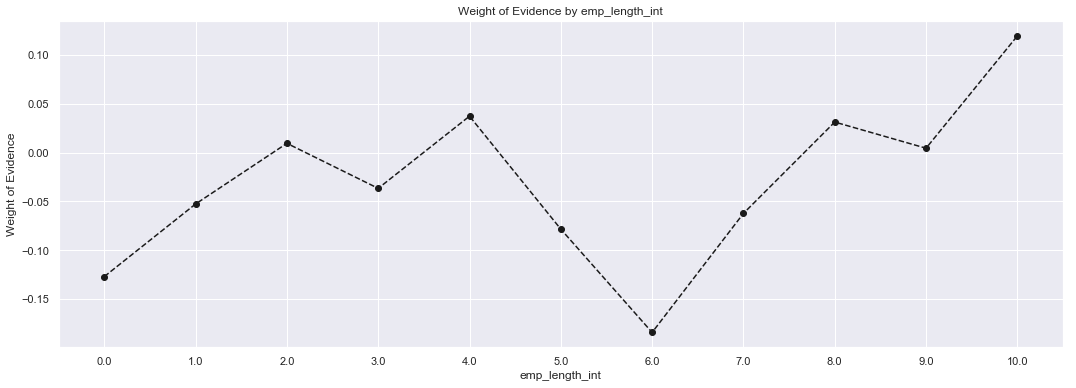

In [55]:
df_temp = woe_ordered_cont(df_discrete, 'emp_length_int', good_bad_var)
print(df_temp)
woe_plot(df_temp)

In [56]:
df_discrete['emp_length_0'] = np.where((df_discrete['emp_length_int'].isin([0])), 1, 0)
df_discrete['emp_length_1_2_3_4'] = np.where((df_discrete['emp_length_int'].isin(range(1,5))), 1, 0)
df_discrete['emp_length_5'] = np.where((df_discrete['emp_length_int'].isin([5])), 1, 0)
df_discrete['emp_length_6'] = np.where((df_discrete['emp_length_int'].isin([6])), 1, 0)
df_discrete['emp_length_7'] = np.where((df_discrete['emp_length_int'].isin([7])), 1, 0)
df_discrete['emp_length_8'] = np.where((df_discrete['emp_length_int'].isin([8])), 1, 0)
df_discrete['emp_length_9'] = np.where((df_discrete['emp_length_int'].isin([9])), 1, 0)
df_discrete['emp_length_10'] = np.where((df_discrete['emp_length_int'].isin([10])), 1, 0)

In [57]:
df_discrete['mnths_since_issue_d'].unique()

array([ 82.,  54.,  55.,  92.,  52.,  58.,  83.,  56.,  85.,  61.,  69.,
        72.,  75.,  53.,  57.,  59.,  88., 100.,  79.,  63.,  93.,  66.,
        70.,  65., 117.,  94.,  60.,  76., 104., 118.,  97.,  78.,  91.,
       102.,  62.,  64., 103., 121.,  74., 120.,  71.,  67.,  81.,  95.,
       111., 123.,  96.,  84.,  77.,  87.,  80., 126., 107.,  68., 115.,
       112., 136., 138., 130.,  99.,  89.,  73., 109., 106., 101.,  90.,
       116.,  86., 124.,  98., 105., 114., 128., 125., 113., 132., 149.,
       122., 150., 108., 110., 137., 131., 146., 119., 133., 141., 145.,
       147., 127., 134., 129., 151., 139., 144., 135., 143., 148., 152.,
       142., 153., 140., 154.])

In [58]:
df_discrete['mnths_since_issue_d_factor'] = pd.cut(df_discrete['mnths_since_issue_d'], 50)
#df_discrete['mnths_since_issue_d_factor']

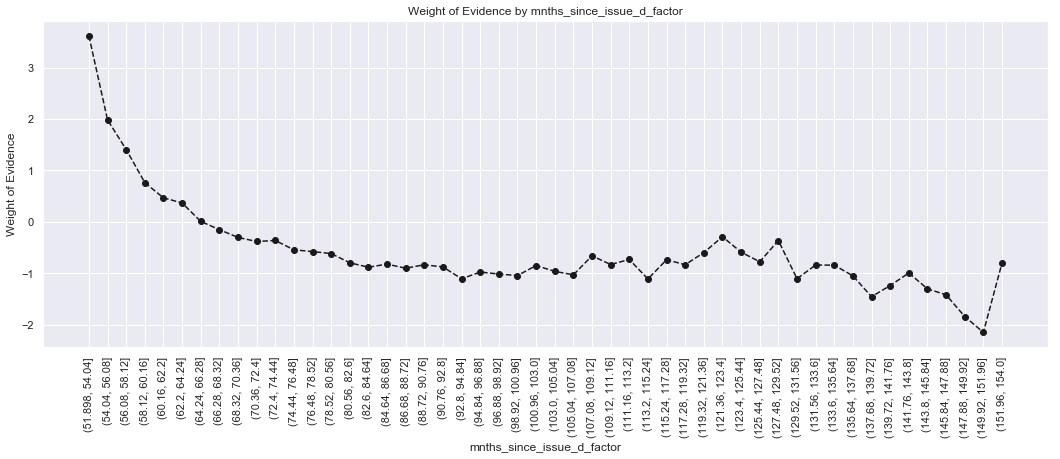

In [59]:
df_temp = woe_ordered_cont(df_discrete, 'mnths_since_issue_d_factor', good_bad_var)
#print(df_temp)
woe_plot(df_temp, 90)

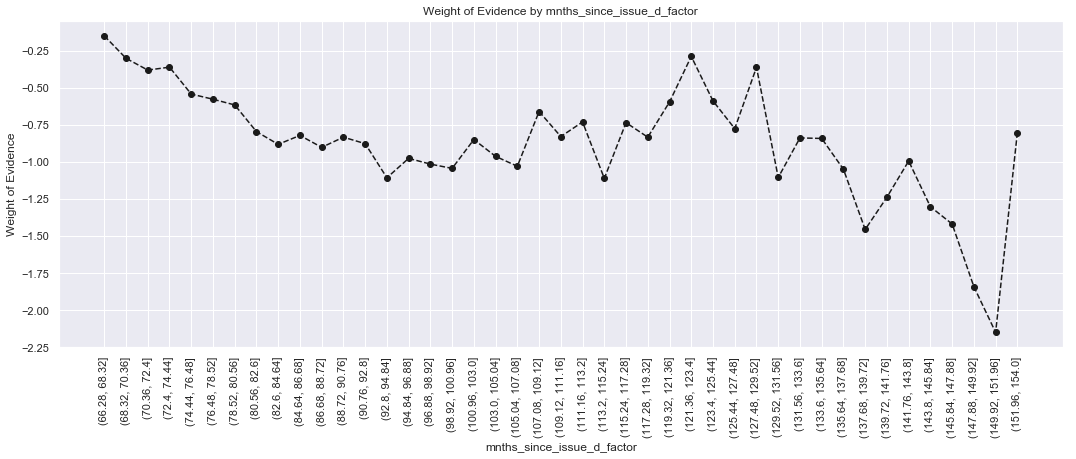

In [60]:
woe_plot(df_temp.iloc[7: , :], 90)

Based on the WOE values and the fequency distribution, the groupings have been done below.

In [61]:
df_discrete['mnths_since_issue_d_factor_<54'] = np.where((df_discrete['mnths_since_issue_d'].isin(range(51, 54))), 1, 0)
df_discrete['mnths_since_issue_d_factor_54_56'] = np.where((df_discrete['mnths_since_issue_d'].isin(range(54, 56))), 1, 0)
df_discrete['mnths_since_issue_d_factor_56_58'] = np.where((df_discrete['mnths_since_issue_d'].isin(range(56, 58))), 1, 0)
df_discrete['mnths_since_issue_d_factor_58_60'] = np.where((df_discrete['mnths_since_issue_d'].isin(range(58, 60))), 1, 0)
df_discrete['mnths_since_issue_d_factor_60_62'] = np.where((df_discrete['mnths_since_issue_d'].isin(range(60, 62))), 1, 0)
df_discrete['mnths_since_issue_d_factor_62_72'] = np.where((df_discrete['mnths_since_issue_d'].isin(range(62, 72))), 1, 0)
df_discrete['mnths_since_issue_d_factor_72_82'] = np.where((df_discrete['mnths_since_issue_d'].isin(range(72, 82))), 1, 0)
df_discrete['mnths_since_issue_d_factor_>82'] = np.where((df_discrete['mnths_since_issue_d'].isin(range(82, int(df_discrete['mnths_since_issue_d'].max())))), 1, 0)

In [62]:
df_discrete['int_rate_factor'] = pd.cut(df_discrete['int_rate'], 50)

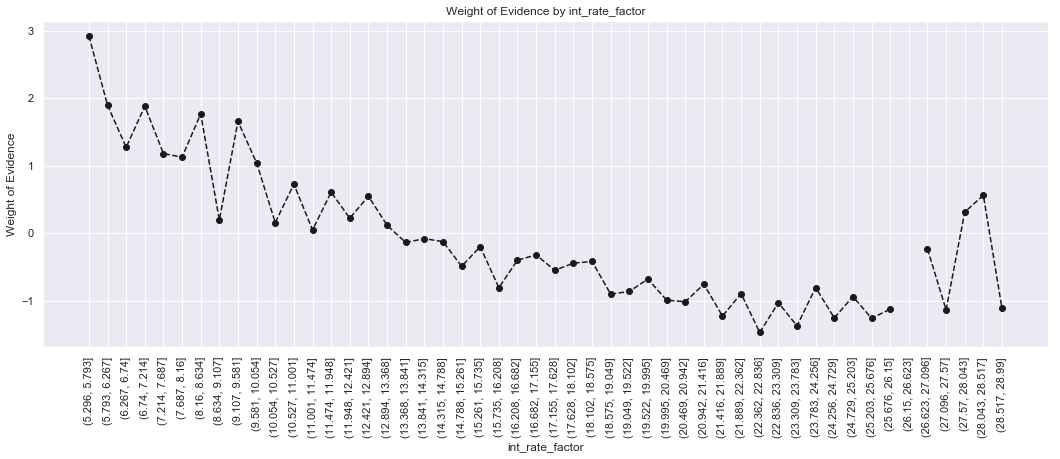

In [63]:
df_temp = woe_ordered_cont(df_discrete, 'int_rate_factor', good_bad_var)
#print(df_temp)
woe_plot(df_temp, 90)

In [64]:
df_discrete['int_rate_factor_<10'] = np.where((df_discrete['int_rate'].isin(range(int(df_discrete['int_rate'].min()), 11))), 1, 0)
df_discrete['int_rate_factor_10_15'] = np.where((df_discrete['int_rate'].isin(range(11, 15))), 1, 0)
df_discrete['int_rate_factor_15_20'] = np.where((df_discrete['int_rate'].isin(range(15, 20))), 1, 0)
df_discrete['int_rate_factor_>20'] = np.where((df_discrete['int_rate'].isin(range(20, int(df_discrete['int_rate'].max())))), 1, 0)

In [65]:
df_discrete['funded_amnt_factor'] = pd.cut(df_discrete['funded_amnt'], 50)
#df_discrete['funded_amnt_factor']

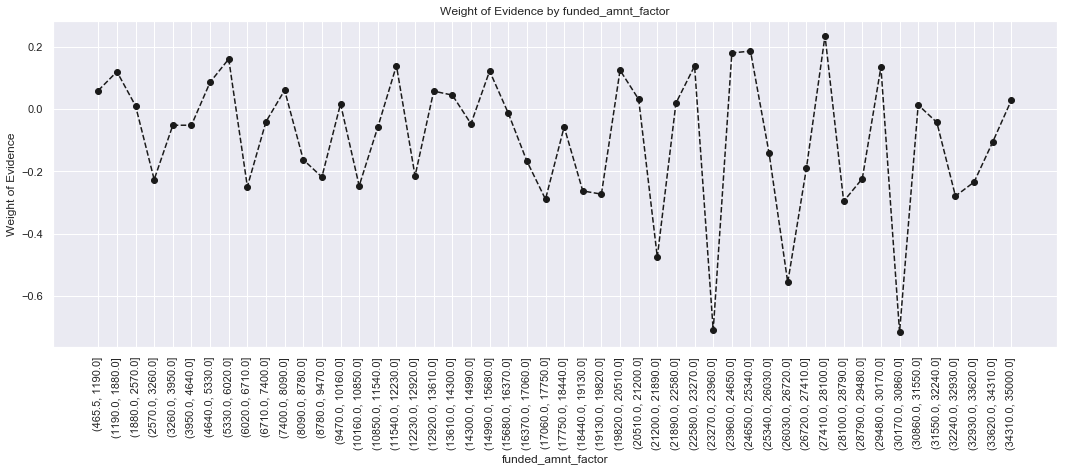

In [66]:
df_temp = woe_ordered_cont(df_discrete, 'funded_amnt_factor',good_bad_var)
woe_plot(df_temp, 90)

As we can see, there is no pattern which means the funded amount column doesn't help to predict the default whatsoever. Hence, this column will not be used for modeling.

In [67]:
df_discrete['mnths_since_earliest_cr_line_factor'] = pd.cut(df_discrete['mnths_since_earliest_cr_line'], 40)
df_discrete['mnths_since_earliest_cr_line_factor'].unique()

[(297.375, 320.25], (183.0, 205.875], (160.125, 183.0], (251.625, 274.5], (205.875, 228.75], ..., (777.75, 800.625], (892.125, 915.0], (800.625, 823.5], (-0.915, 22.875], (823.5, 846.375]]
Length: 36
Categories (36, interval[float64]): [(-0.915, 22.875] < (68.625, 91.5] < (91.5, 114.375] < (114.375, 137.25] ... (777.75, 800.625] < (800.625, 823.5] < (823.5, 846.375] < (892.125, 915.0]]

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\algorithms.py:1823: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


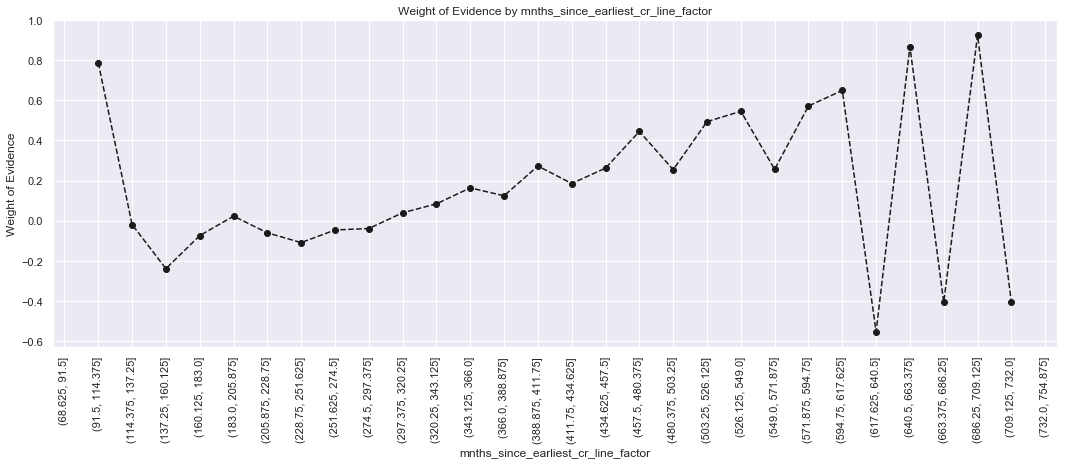

In [68]:
df_temp = woe_ordered_cont(df_discrete, 'mnths_since_earliest_cr_line_factor',good_bad_var)
woe_plot(df_temp, 90)

In [69]:
df_temp

,mnths_since_earliest_cr_line_factor,obs,good_prop,prop_obs,good,bad,prop_good,prop_bad,woe,diff_prop_good,diff_woe,IV
0,"(-0.915, 22.875]",6,1.000000,0.000034,6.0,0.0,0.000036,0.000000,inf,NaN,NaN,inf
1,"(22.875, 45.75]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
2,"(45.75, 68.625]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
3,"(68.625, 91.5]",34,1.000000,0.000192,34.0,0.0,0.000205,0.000000,inf,NaN,NaN,inf
4,"(91.5, 114.375]",2071,0.969097,0.011669,2007.0,64.0,0.012101,0.005508,0.787029,0.030903,inf,inf
5,"(114.375, 137.25]",3599,0.933315,0.020279,3359.0,240.0,0.020252,0.020656,-0.019725,0.035782,0.806754,inf
6,"(137.25, 160.125]",8330,0.918247,0.046936,7649.0,681.0,0.046118,0.058611,-0.239716,0.015068,0.219992,inf
7,"(160.125, 183.0]",13834,0.929811,0.077949,12863.0,971.0,0.077555,0.083570,-0.074700,0.011563,0.165016,inf
8,"(183.0, 205.875]",18497,0.935881,0.104223,17311.0,1186.0,0.104373,0.102074,0.022272,0.006071,0.096972,inf
9,"(205.875, 228.75]",22700,0.930705,0.127905,21127.0,1573.0,0.127381,0.135382,-0.060917,0.005177,0.083189,inf


In [70]:
df_discrete['mnths_since_earliest_cr_line_factor_<160'] = np.where((df_discrete['mnths_since_earliest_cr_line'].isin(range(0, 160))),1 ,0)
df_discrete['mnths_since_earliest_cr_line_factor_160_343'] = np.where((df_discrete['mnths_since_earliest_cr_line'].isin(range(160, 343))),1 ,0)
df_discrete['mnths_since_earliest_cr_line_factor_343_571'] = np.where((df_discrete['mnths_since_earliest_cr_line'].isin(range(343, 571))),1 ,0)
df_discrete['mnths_since_earliest_cr_line_factor_>571'] = np.where((df_discrete['mnths_since_earliest_cr_line'].isin(range(571, int(df_discrete['mnths_since_earliest_cr_line'].max())))),1 ,0)

In [71]:
df_discrete['annual_inc_factor'] = pd.cut(df_discrete['annual_inc'], 50)

In [72]:
df_temp = woe_ordered_cont(df_discrete, 'annual_inc_factor', good_bad_var)
#df_temp

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\algorithms.py:1823: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


The first interval contains alost 95% of the observations. Hence, we could create more than 50 classes, let's say 100.

In [73]:
df_discrete['annual_inc_factor'] = pd.cut(df_discrete['annual_inc'], 100)
df_temp = woe_ordered_cont(df_discrete, 'annual_inc_factor', good_bad_var)
#df_temp

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\algorithms.py:1823: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


If we take a closer look, we see we could create one dummy variable for large income group, and another for low income group. Let us consider people with income more than $190,000 come in the high-income category and less than that in low income category.

In [74]:
df_discrete_temp = df_discrete.loc[df_discrete['annual_inc'] <= 190000, :]

In [75]:
df_discrete_temp['annual_inc_factor'] = pd.cut(df_discrete_temp['annual_inc'], 50)
df_temp = woe_ordered_cont(df_discrete_temp, 'annual_inc_factor', good_bad_var[df_discrete_temp.index])
df_temp

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,annual_inc_factor,obs,good_prop,prop_obs,good,bad,prop_good,prop_bad,woe,diff_prop_good,diff_woe,IV
0,"(1581.77, 5534.6]",12,0.833333,0.000069,10.0,2.0,0.000062,0.000175,-1.038246,NaN,NaN,0.060296
1,"(5534.6, 9299.2]",70,0.942857,0.000404,66.0,4.0,0.000408,0.000349,0.155676,0.109524,1.193922,0.060296
2,"(9299.2, 13063.8]",412,0.893204,0.002379,368.0,44.0,0.002276,0.003842,-0.523791,0.049653,0.679467,0.060296
3,"(13063.8, 16828.4]",716,0.918994,0.004135,658.0,58.0,0.004069,0.005065,-0.218922,0.025791,0.304869,0.060296
4,"(16828.4, 20593.0]",1504,0.916888,0.008686,1379.0,125.0,0.008528,0.010916,-0.246884,0.002106,0.027962,0.060296
5,"(20593.0, 24357.6]",2288,0.902972,0.013214,2066.0,222.0,0.012777,0.019387,-0.416992,0.013916,0.170108,0.060296
6,"(24357.6, 28122.2]",4086,0.908468,0.023597,3712.0,374.0,0.022956,0.032661,-0.352614,0.005496,0.064378,0.060296
7,"(28122.2, 31886.8]",4893,0.910484,0.028258,4455.0,438.0,0.027551,0.038250,-0.328121,0.002016,0.024493,0.060296
8,"(31886.8, 35651.4]",7505,0.914857,0.043343,6866.0,639.0,0.042461,0.055803,-0.273252,0.004372,0.054869,0.060296
9,"(35651.4, 39416.0]",6096,0.911581,0.035206,5557.0,539.0,0.034365,0.047070,-0.314586,0.003275,0.041334,0.060296


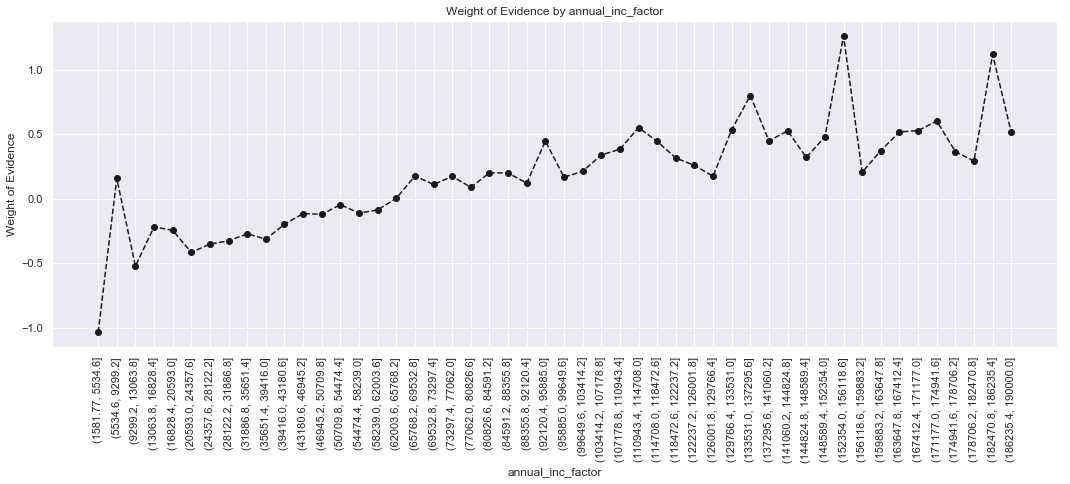

In [76]:
woe_plot(df_temp, 90)

In [77]:
df_temp

,annual_inc_factor,obs,good_prop,prop_obs,good,bad,prop_good,prop_bad,woe,diff_prop_good,diff_woe,IV
0,"(1581.77, 5534.6]",12,0.833333,0.000069,10.0,2.0,0.000062,0.000175,-1.038246,NaN,NaN,0.060296
1,"(5534.6, 9299.2]",70,0.942857,0.000404,66.0,4.0,0.000408,0.000349,0.155676,0.109524,1.193922,0.060296
2,"(9299.2, 13063.8]",412,0.893204,0.002379,368.0,44.0,0.002276,0.003842,-0.523791,0.049653,0.679467,0.060296
3,"(13063.8, 16828.4]",716,0.918994,0.004135,658.0,58.0,0.004069,0.005065,-0.218922,0.025791,0.304869,0.060296
4,"(16828.4, 20593.0]",1504,0.916888,0.008686,1379.0,125.0,0.008528,0.010916,-0.246884,0.002106,0.027962,0.060296
5,"(20593.0, 24357.6]",2288,0.902972,0.013214,2066.0,222.0,0.012777,0.019387,-0.416992,0.013916,0.170108,0.060296
6,"(24357.6, 28122.2]",4086,0.908468,0.023597,3712.0,374.0,0.022956,0.032661,-0.352614,0.005496,0.064378,0.060296
7,"(28122.2, 31886.8]",4893,0.910484,0.028258,4455.0,438.0,0.027551,0.038250,-0.328121,0.002016,0.024493,0.060296
8,"(31886.8, 35651.4]",7505,0.914857,0.043343,6866.0,639.0,0.042461,0.055803,-0.273252,0.004372,0.054869,0.060296
9,"(35651.4, 39416.0]",6096,0.911581,0.035206,5557.0,539.0,0.034365,0.047070,-0.314586,0.003275,0.041334,0.060296


In [78]:
df_discrete['annual_inc_factor_<40K'] = np.where((df_discrete['annual_inc'] <= 40000), 1, 0)
df_discrete['annual_inc_factor_40K_60K'] = np.where((df_discrete['annual_inc'] > 40000) & (df_discrete['annual_inc'] <= 60000), 1, 0)
df_discrete['annual_inc_factor_60K_80K'] = np.where((df_discrete['annual_inc'] > 60000) & (df_discrete['annual_inc'] <= 80000), 1, 0)
df_discrete['annual_inc_factor_80K_100K'] = np.where((df_discrete['annual_inc'] > 80000) & (df_discrete['annual_inc'] <= 100000), 1, 0)
df_discrete['annual_inc_factor_100K_120K'] = np.where((df_discrete['annual_inc'] > 100000) & (df_discrete['annual_inc'] <= 120000), 1, 0)
df_discrete['annual_inc_factor_120K_140K'] = np.where((df_discrete['annual_inc'] > 120000) & (df_discrete['annual_inc'] <= 140000), 1, 0)
df_discrete['annual_inc_factor_>140K'] = np.where((df_discrete['annual_inc'] > 140000), 1, 0)

Months since deliq has lots of missing values. Hence we first create another class variable which gets the value of 1 if the value is missing else 0.

In [79]:
df_discrete_temp = df_discrete[pd.notnull(df_discrete['mths_since_last_delinq'])]
df_discrete_temp['mths_since_last_delinq_factor'] = pd.cut(df_discrete['mths_since_last_delinq'], 50)
df_temp = woe_ordered_cont(df_discrete_temp, 'mths_since_last_delinq_factor', good_bad_var[df_discrete_temp.index])
df_temp

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\algorithms.py:1823: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


,mths_since_last_delinq_factor,obs,good_prop,prop_obs,good,bad,prop_good,prop_bad,woe,diff_prop_good,diff_woe,IV
0,"(-0.188, 3.76]",2811,0.933120,0.032393,2623.0,188.0,0.032217,0.035062,-0.084615,NaN,NaN,inf
1,"(3.76, 7.52]",5943,0.939593,0.068484,5584.0,359.0,0.068585,0.066953,0.024091,0.006473,0.108706,inf
2,"(7.52, 11.28]",6700,0.940000,0.077208,6298.0,402.0,0.077355,0.074972,0.031288,0.000407,0.007197,inf
3,"(11.28, 15.04]",6569,0.931496,0.075698,6119.0,450.0,0.075156,0.083924,-0.110341,0.008504,0.141629,inf
4,"(15.04, 18.8]",4577,0.934236,0.052743,4276.0,301.0,0.052520,0.056136,-0.066584,0.002740,0.043757,inf
5,"(18.8, 22.56]",5715,0.942082,0.065857,5384.0,331.0,0.066129,0.061731,0.068821,0.007846,0.135405,inf
6,"(22.56, 26.32]",5534,0.940549,0.063771,5205.0,329.0,0.063930,0.061358,0.041070,0.001533,0.027751,inf
7,"(26.32, 30.08]",5333,0.939434,0.061455,5010.0,323.0,0.061535,0.060239,0.021292,0.001116,0.019778,inf
8,"(30.08, 33.84]",3780,0.941005,0.043559,3557.0,223.0,0.043689,0.041589,0.049254,0.001572,0.027962,inf
9,"(33.84, 37.6]",4895,0.940143,0.056408,4602.0,293.0,0.056524,0.054644,0.033827,0.000862,0.015427,inf


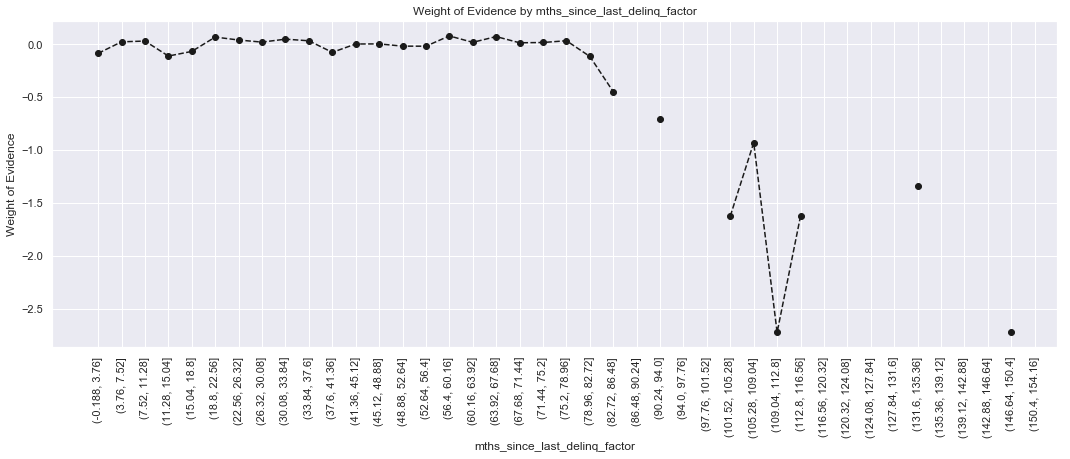

In [80]:
woe_plot(df_temp, 90)

In [81]:
df_discrete['mths_since_last_delinq_missing'] = np.where((df_discrete['mths_since_last_delinq'].isnull()), 1, 0)
df_discrete['mths_since_last_delinq_0_3'] = np.where((df_discrete['mths_since_last_delinq'] >= 0) & (df_discrete['mths_since_last_delinq'] < 4), 1, 0)
df_discrete['mths_since_last_delinq_4_30'] = np.where((df_discrete['mths_since_last_delinq'] >= 4) & (df_discrete['mths_since_last_delinq'] < 30), 1, 0)
df_discrete['mths_since_last_delinq_31_56'] = np.where((df_discrete['mths_since_last_delinq'] >= 30) & (df_discrete['mths_since_last_delinq'] < 56), 1, 0)
df_discrete['mths_since_last_delinq_>57'] = np.where((df_discrete['mths_since_last_delinq'] >= 57), 1, 0)

#### Preprocessing the Test dataset

In [82]:
#X_train = df_discrete
#X_train.shape
X_test = df_discrete
X_test.shape

To create the same set of variables in the test set as well, assign df_discrete to the test dataset and repeat the same process.

In [83]:
#X_train.to_csv('X_train.csv', index = False)
#X_test.to_csv('X_test.csv', index = False)
y_train.to_csv('y_train.csv', index = False)
y_test.to_csv('y_test.csv', index = False)

In [84]:
#X_test.isnull().sum()